# Clustering with `md.rmsd()` and `scipy.cluster.hierarchy`

In this example, we cluster our alanine dipeptide trajectory using the [RMSD distance metric](http://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions) and [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

import mdtraj as md

Let's load up our trajectory. This is the trajectory that we generated in the "Running a simulation in OpenMM and analyzing the results with mdtraj" example. The first step is to build the rmsd cache, which precalculates some values for the RMSD computation.

In [2]:
traj = md.load("ala2.h5")

/Users/singhs15/work/src/dev-projs/mdtraj/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


Lets compute all pairwise rmsds between conformations.

In [3]:
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print("Max pairwise rmsd: %f nm" % np.max(distances))

Max pairwise rmsd: 0.188493 nm


`scipy.cluster` implements the average linkage algorithm (among others)

In [4]:
# Clustering only accepts reduced form. Squareform's checks are too stringent
assert np.all(distances - distances.T < 1e-6)
reduced_distances = squareform(distances, checks=False)

In [5]:
linkage = scipy.cluster.hierarchy.linkage(reduced_distances, method="average")

Lets plot the resulting dendrogram.

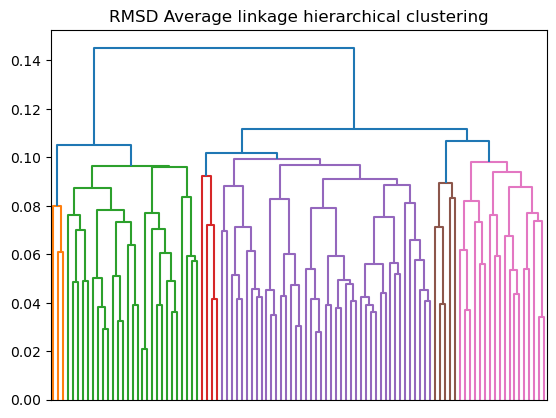

In [6]:
plt.title("RMSD Average linkage hierarchical clustering")
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort="descendent")